# CIFAR 10 Object Recognition using CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from keras import datasets,layers,models

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

In [8]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [9]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

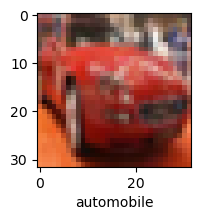

In [11]:
plot_sample(X_train,y_train,5)

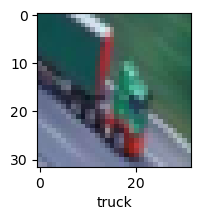

In [12]:
plot_sample(X_train,y_train,50)

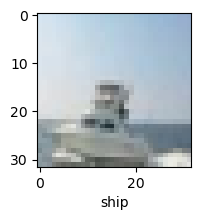

In [13]:
plot_sample(X_train,y_train,100)

In [14]:
# normalize images =normalize images to 0 to 1 RGB=have 250 
X_train=X_train/255.0
X_test=X_test/255.0

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPooling2D 
from keras.optimizers import Adam # Adaptive Moment Estimation

In [16]:
# Build the CNN model
cnn=models.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 42, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(56, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [17]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.3899 - loss: 1.6881
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5916 - loss: 1.1594
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6493 - loss: 1.0119
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6770 - loss: 0.9253
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7006 - loss: 0.8633
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7167 - loss: 0.8147
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7325 - loss: 0.7605
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7456 - loss: 0.7254
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7599 - loss: 0.6868
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7679 - loss: 0.6659
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7750 - loss: 0.6386
Epoch 12

In [38]:
cnn.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6877 - loss: 1.0564


[1.0678309202194214, 0.6830999851226807]

In [42]:
y_pred=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [44]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 6]

In [46]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

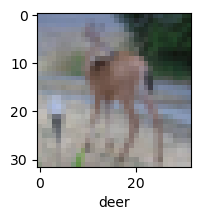

In [50]:
plot_sample(X_test,y_test,100)

In [56]:
classes[y_classes[100]]

'deer'

In [60]:
cm = confusion_matrix(y_test, y_classes)
print(cm)

[[642  14  78  17  39  15   8  13 128  46]
 [ 17 715  11  16   4   3  14   5  61 154]
 [ 39   8 599  64 108  60  60  30  19  13]
 [ 13  13  70 455 101 183  80  34  29  22]
 [ 15   5  76  56 681  42  38  65  16   6]
 [ 10   6  70 158  60 573  32  61  17  13]
 [  3   1  57  63  55  26 768  12  11   4]
 [ 14   3  43  45  73  56  10 730  10  16]
 [ 40  14  11  15  12   6   9   7 848  38]
 [ 20  41  13  11  10   8   9  19  49 820]]


In [62]:
cm = classification_report(y_test, y_classes)
print(cm)

              precision    recall  f1-score   support

           0       0.79      0.64      0.71      1000
           1       0.87      0.71      0.79      1000
           2       0.58      0.60      0.59      1000
           3       0.51      0.46      0.48      1000
           4       0.60      0.68      0.64      1000
           5       0.59      0.57      0.58      1000
           6       0.75      0.77      0.76      1000
           7       0.75      0.73      0.74      1000
           8       0.71      0.85      0.78      1000
           9       0.72      0.82      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

